# Sudden Stop Model

In this notebook we replicate the baseline model exposed in 

`From Sudden Stops to Fisherian Deflation, Quantitative Theory and Policy` by __Anton Korinek and Enrique G. Mendoza__

The file `sudden_stop.yaml` which is printed below, describes the model, and must be included in the same directory as this notebook.

## importing necessary functions

In [7]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
from dolo import *
from dolo.algos import time_iteration
from dolo.algos import plot_decision_rule, simulate

## writing the model

In [9]:
pwd

'/home/pablo/Mobilhome/econforge/dolo/examples/notebooks'

In [10]:
# filename = 'https://raw.githubusercontent.com/EconForge/dolo/master/examples/models/compat/sudden_stop.yaml'
filename = '../models/sudden_stop.yaml'
# the model file is coded in a separate file called sudden_stop.yaml
# note how the borrowing constraint is implemented as complementarity condition
pcat(filename)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64


## importing the model

Note, that residuals, are not zero at the calibration we supply. This is because the representative agent is impatient
and we have $\beta<1/R$. In this case it doesn't matter.

By default, the calibrated value for endogenous variables are used as a (constant) starting point for the decision rules.

In [11]:
model = yaml_import(filename)
model

Model:
        ------
        name: "Sudden Stop (General)"
        type: "dtcc"
        file: "../models/sudden_stop.yaml

Equations:
----------

transition
 1  : 0.0000 : l(0) == b(-(1))

arbitrage
 1  : 0.0000 : lam(0) == (b(0)) / (c(0))
 2  : 0.0215 : (1) - (((beta) * (((c(1)) / (c(0))) ** (-(sigma)))) * (R))

definitions
 1  : c = 1 + y + l*R - b

In [72]:
# to avoid numerical glitches we choose a relatively high number of grid points
mdr = time_iteration(model, verbose=True)

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  5.133e-01 |      nan |    0.082 |  10 |
|   2 |  1.703e-01 |    0.332 |    0.028 |   8 |
|   3 |  8.433e-02 |    0.495 |    0.018 |   6 |
|   4 |  5.005e-02 |    0.594 |    0.014 |   6 |
|   5 |  3.290e-02 |    0.657 |    0.014 |   6 |
|   6 |  2.315e-02 |    0.704 |    0.037 |   6 |


    Did not converge


|   7 |  1.705e-02 |    0.737 |    0.029 |   6 |
|   8 |  1.298e-02 |    0.761 |    0.021 |   5 |
|   9 |  1.013e-02 |    0.780 |    0.013 |   5 |
|  10 |  8.050e-03 |    0.795 |    0.012 |   5 |
|  11 |  6.493e-03 |    0.807 |    0.011 |   5 |
|  12 |  5.297e-03 |    0.816 |    0.046 |   5 |
|  13 |  4.359e-03 |    0.823 |    0.010 |   4 |
|  14 |  3.770e-03 |    0.865 |    0.032 |   4 |
|  15 |  3.917e-03 |    1.039 |    0.015 |   4 |
|  16 |  4.054e-03 |    1.035 |    0.010 |   4 |
|  17 |  4.072e-03 |    1.004 |    0.019 |   4 |
|  18 |  3.947e-03 |    0.969 |    0.020 |   4 |
|  19 |  3.675e-03 |    0.931 |    0.012 |   4 |
|  20 |  3.269e-03 |    0.890 |    0.007 |   3 |
|  21 |  2.861e-03 |    0.875 |    0.008 |   3 |
|  22 |  3.028e-03 |    1.058 |    0.007 |   3 |
|  23 |  3.084e-03 |    1.018 |    0.007 |   3 |
|  24 |  3.088e-03 |    1.001 |    0.007 |   3 |
|  25 |  2.973e-03 |    0.963 |    0.007 |   3 |
|  26 |  2.690e-03 |    0.905 |    0.007 |   3 |
|  27 |  2.469e-03 |

In [75]:
# produce the plots
n_steps = 100

tab0 = tabulate(model, mdr, 'l', i0=0, n_steps=n_steps)
tab1 = tabulate(model, mdr, 'l', i0=1, n_steps=n_steps)

In [76]:
lam_inf = model.calibration['lam_inf']

Text(0.5, 0.98, 'Decision Rules')

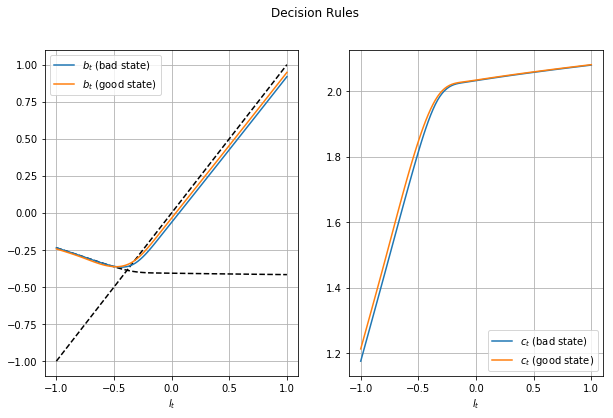

In [77]:
plt.subplot(121)

plt.plot(tab0['l'], tab0['l'], linestyle='--', color='black', label='')
plt.plot(tab0['l'], lam_inf*tab0['c'], linestyle='--', color='black', label='')
plt.plot(tab0['l'], tab0['b'], label='$b_t$ (bad state)' )
plt.plot(tab0['l'], tab1['b'], label='$b_t$ (good state)')
# plt.plot(tab0['l'], lam_inf*tab1['c'])
plt.grid()
xlabel('$l_t$')

legend(loc= 'upper left')

plt.subplot(122)
plt.plot(tab0['l'], tab0['c'], label='$c_t$ (bad state)' )
plt.plot(tab0['l'], tab1['c'], label='$c_t$ (good state)' )
legend(loc= 'lower right')
plt.grid()
xlabel('$l_t$')

plt.suptitle("Decision Rules")

In [84]:
# if we want we can use altair/vega-lite instead

In [86]:
import altair as alt
import pandas

In [166]:
# first we need to convert data into flat format
df = pandas.concat([tab0, tab1], keys=['bad','good'], names=['experiment'])
df = df.reset_index().drop(columns=['level_1']) # maybe there is a more elegant option here

In [176]:
lam_inf = model.calibration['lam_inf']

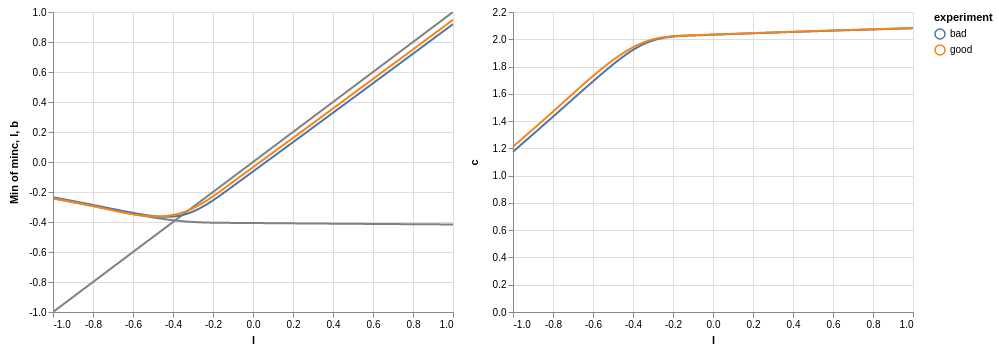

In [208]:
# then we can play
base = alt.Chart(df).mark_line()
ch1 = base.encode(x='l', y='b', color='experiment').interactive()
ch1_min = base.mark_line(color='grey').transform_calculate(minc=f'{lam_inf}*datum.c').encode(x='l',y=alt.Y('minc:Q', aggregate='min'))
ch1_max = base.mark_line(color='grey').encode(x='l',y='l')
ch2 = base.encode(x='l', y='c', color='experiment')

(ch1_min+ch1_max+ch1|ch2)

## stochastic simulations

In [78]:
i_0 = 1 # we start from the good state
sim = simulate(model, mdr, i0=i_0, s0=np.array([0.5]), N=1, T=100) # markov_indices=markov_indices)
sim # result is an xarray object

<xarray.DataArray (T: 100, N: 1, V: 5)>
array([[[ 1.      ,  0.5     , ...,  0.220895,  2.059955]],

       [[ 0.97    ,  0.455045, ...,  0.185854,  2.056478]],

       ...,

       [[ 0.97    , -0.332575, ..., -0.175531,  1.973936]],

       [[ 0.97    , -0.346488, ..., -0.179044,  1.964891]]])
Coordinates:
  * T        (T) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * N        (N) int64 0
  * V        (V) <U3 'y' 'l' 'b' 'lam' 'c'

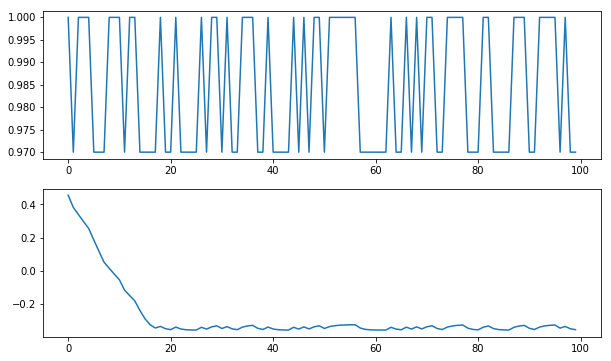

In [79]:
plt.subplot(211)
plt.plot(sim.sel(V='y'))
plt.subplot(212)
plt.plot(sim.sel(V='b'))

## Sensitivity analysis

Here we want to compare the saving behaviour as a function of risk aversion $\sigma$.
We contrast the baseline $\sigma=2$ with the high aversion scenario $\sigma=16$.

In [80]:
# we solve the model with sigma=16
model.set_calibration(sigma=16.0)
mdr_high_gamma = time_iteration(model, verbose=True)

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  5.133e-01 |      nan |    0.036 |  10 |
|   2 |  1.703e-01 |    0.332 |    0.021 |   8 |
|   3 |  8.433e-02 |    0.495 |    0.014 |   6 |
|   4 |  5.005e-02 |    0.594 |    0.014 |   6 |
|   5 |  3.290e-02 |    0.657 |    0.014 |   6 |
|   6 |  2.315e-02 |    0.704 |    0.014 |   6 |
|   7 |  1.705e-02 |    0.737 |    0.014 |   6 |
|   8 |  1.298e-02 |    0.761 |    0.012 |   5 |
|   9 |  1.013e-02 |    0.780 |    0.012 |   5 |
|  10 |  8.050e-03 |    0.795 |    0.012 |   5 |
|  11 |  6.493e-03 |    0.807 |    0.011 |   5 |
|  12 |  5.297e-03 |    0.816 |    0.011 |   5 |


    Did not converge


|  13 |  4.359e-03 |    0.823 |    0.014 |   4 |
|  14 |  3.770e-03 |    0.865 |    0.044 |   4 |
|  15 |  3.917e-03 |    1.039 |    0.015 |   4 |
|  16 |  4.054e-03 |    1.035 |    0.010 |   4 |
|  17 |  4.072e-03 |    1.004 |    0.010 |   4 |
|  18 |  3.947e-03 |    0.969 |    0.013 |   4 |
|  19 |  3.675e-03 |    0.931 |    0.010 |   4 |
|  20 |  3.269e-03 |    0.890 |    0.008 |   3 |
|  21 |  2.861e-03 |    0.875 |    0.007 |   3 |
|  22 |  3.028e-03 |    1.058 |    0.007 |   3 |
|  23 |  3.084e-03 |    1.018 |    0.007 |   3 |
|  24 |  3.088e-03 |    1.001 |    0.007 |   3 |
|  25 |  2.973e-03 |    0.963 |    0.007 |   3 |
|  26 |  2.690e-03 |    0.905 |    0.007 |   3 |
|  27 |  2.469e-03 |    0.918 |    0.007 |   3 |
|  28 |  2.592e-03 |    1.050 |    0.007 |   3 |
|  29 |  2.585e-03 |    0.997 |    0.007 |   3 |
|  30 |  2.505e-03 |    0.969 |    0.007 |   3 |
|  31 |  2.252e-03 |    0.899 |    0.007 |   3 |
|  32 |  2.174e-03 |    0.965 |    0.007 |   3 |
|  33 |  2.234e-03 |

In [81]:
# now we compare the decision rules with low and high risk aversion

In [82]:
tab0 = tabulate(model, mdr, 'l', i0=0)
tab1 = tabulate(model, mdr, 'l', i0=1)
tab0_hg = tabulate(model, mdr_high_gamma, 'l', i0=0)
tab1_hg = tabulate(model, mdr_high_gamma, 'l', i0=1)

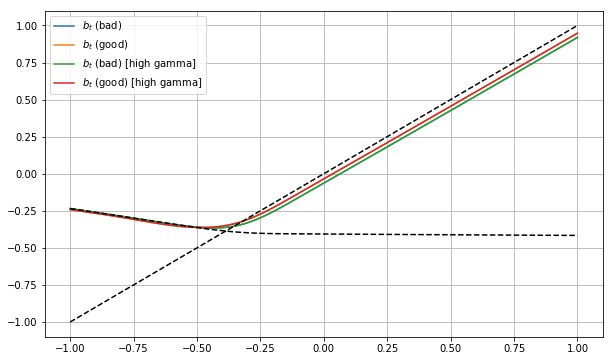

In [83]:
plt.plot(tab0['l'], tab0['b'], label='$b_t$ (bad)' )
plt.plot(tab0['l'], tab1['b'],  label='$b_t$ (good)' )

plt.plot(tab0['l'], tab0_hg['b'], label='$b_t$ (bad) [high gamma]' )
plt.plot(tab0['l'], tab1_hg['b'], label='$b_t$ (good) [high gamma]' )
plot(tab0['l'], tab0['l'], linestyle='--', color='black', label='')
plot(tab0['l'], -0.2*tab0['c'], linestyle='--', color='black', label='')
legend(loc= 'upper left')
plt.grid()